In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
gaussians = np.load('/lustre/aoc/projects/hera/wchin/gaussians.npy')
radii = np.arange(9, 1, -1)  # array([34, 32, 30,... 6, 4]) units: voxels (51, 3, -3)
iterations = int(1e5)
redshifts = np.arange(8.5, 4, -0.5)
BOX_LEN=301
HII_DIM=301
total_neutral_fractions = np.array([7.32499807e-01, 6.28706887e-01, 4.94936030e-01, 3.38962514e-01,
       1.89180400e-01, 7.99697213e-02, 2.22389814e-02, 3.54182052e-03,
       2.10697631e-04])

## Check if object is iterable

In [3]:
def iterable(obj):
    
    try:
        iter(obj)
        
    except Exception:
        return False
    
    else:
        return True

## Histogram Function

In [4]:
def histogram(
    y1s, 
    figure_shape, 
    y2s=None,
    y3s=None,
    marker_lines=None,
    y1s_labels=None,
    y2s_label=None,
    y3s_label=None,
    title=None, 
    legend_font_size=12,
    fancy_legend_box=True,
    legend_alpha=0.5,
    shared_title=None,
    shared_title_x_position=0.5,   # figure coordinates, max=1 I think
    shared_title_y_position=0.92,
    shared_x_label=None, 
    shared_x_label_x_position=0.5,
    shared_x_label_y_position=0.08,
    shared_y_label=None, 
    shared_y_label_x_position=0.07,
    shared_y_label_y_postion=0.5,
    x_start=0, 
    x_stop=1, 
    bin_num=int(1e3), 
    color='white', 
    figure_size=(18,7), 
    font_size=15, 
    horizontal_gap=0.05, 
    vertical_gap=0.05, 
    y_scale='linear', 
    y_notation='plain', 
    share_x_axis=True, 
    share_y_axis=True,
    dpi=100
):  # a: x start, b: x stop
    
    bin_edges = np.linspace(x_start, x_stop, bin_num) # bin_num of bins from 0-1
    
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    
    if np.array(y1s).ndim > 2:  # hopefully more robust condition.
        
        fig, axes = plt.subplots(
            figure_shape[0], 
            figure_shape[1], 
            figsize=figure_size, 
            sharex=share_x_axis, 
            sharey=share_y_axis, 
            gridspec_kw={"hspace":vertical_gap, 'wspace':horizontal_gap},
            dpi=dpi
        )
        
        if shared_title != None:
            
            fig.suptitle(
                x=shared_title_x_position, 
                y=shared_title_y_position, 
                t=shared_title, ha='center', 
                size=1.5*font_size, 
                color=color
            )
            
        if shared_x_label != None:  # shared x label
            fig.text(
                x=shared_x_label_x_position, 
                y=shared_x_label_y_position, 
                s=shared_x_label, ha='center', 
                size=font_size, 
                color=color
            )

        if shared_y_label != None:  # shared y label
            fig.text(
                x=shared_y_label_x_position, 
                y=shared_y_label_y_postion, 
                s=shared_y_label, 
                va='center', 
                rotation='vertical', 
                size=font_size, 
                color=color
            )
        
        for i, y1 in enumerate(y1s):
            
            for ii, marker_line in enumerate(marker_lines):
                
                if i == 5 and ii == 0:
                    axes.flatten()[i].plot(
                        bin_centers, 
                        np.histogram(y1s[i,ii,:], bins=bin_edges)[0], 
                        marker_line,
                        linewidth=5,
                        label=y1s_labels[ii]
                    )
                else:
                    axes.flatten()[i].plot(
                        bin_centers, 
                        np.histogram(y1s[i,ii,:], bins=bin_edges)[0], 
                        marker_line,
                        label=y1s_labels[ii]
                    )
            
            if iterable(y2s):
                axes.flatten()[i].plot(
                    bin_centers, 
                    np.histogram(y2s[i], bins=bin_edges)[0], 
                    '--', 
                    label=y2s_label
                )
                
                if iterable(y3s):
                    axes.flatten()[i].plot(
                        bin_centers, 
                        np.histogram(y3s[i], bins=bin_edges)[0], 
                        label=y3s_label
                    )
                    
                    
            if y1s_labels != None:
                axes.flatten()[i].legend(
                    prop={'size': legend_font_size}, 
                    fancybox=fancy_legend_box, 
                    framealpha=legend_alpha
                )
                
            if title != None:
                axes.flatten()[i].set_title(title[i], color=color, fontsize=font_size)
                
            axes.flatten()[i].set_yscale(y_scale)
            
            if y_notation == 'sci':
                axes.flatten()[i].ticklabel_format(
                    axis='y', 
                    style=y_notation, 
                    scilimits=(0,0), 
                    useMathText=True
                )
                
            axes.flatten()[i].tick_params(
                color=color, 
                labelcolor=color, 
                labelsize=font_size,
                which='both'
            )  # font style

            for spine in axes.flatten()[i].spines.values():  # figure color
                spine.set_edgecolor(color)
                
    else:
        
        fig, ax = plt.subplots(figsize=figure_size)
        
        ax.plot(bin_centers, np.histogram(y1s, bins=bin_edges)[0], label=y1s_labels)
        
        if y2s != None:
            ax.plot(bin_centers, np.histogram(y2s, bins=bin_edges)[0], '--', label=y2s_label)
            
            if y3s == None:
                ax.legend(
                    prop={'size': legend_font_size}, 
                    fancybox=fancy_legend_box, 
                    framealpha=legend_alpha
                )                 
                
            else:
                ax.plot(bin_centers, np.histogram(y3s, bins=bin_edges)[0], '-.', label=y3s_label)
                ax.legend(
                    prop={'size': legend_font_size}, 
                    fancybox=fancy_legend_box, 
                    framealpha=legend_alpha
                )                 
                
        if title != None:
            ax.set_title(title, color=color, fontsize=font_size)
            
        ax.set_yscale(y_scale)
        
        if y_notation == 'sci':
            ax.ticklabel_format(axis='y', style=y_notation, scilimits=(0,0), useMathText=True)
            
        ax.tick_params(color=color, labelcolor=color, labelsize=font_size, which='both')  # font style

        for spine in ax.spines.values():  # figure color
            spine.set_edgecolor(color)
            
    plt.show()

## Creating Histogram

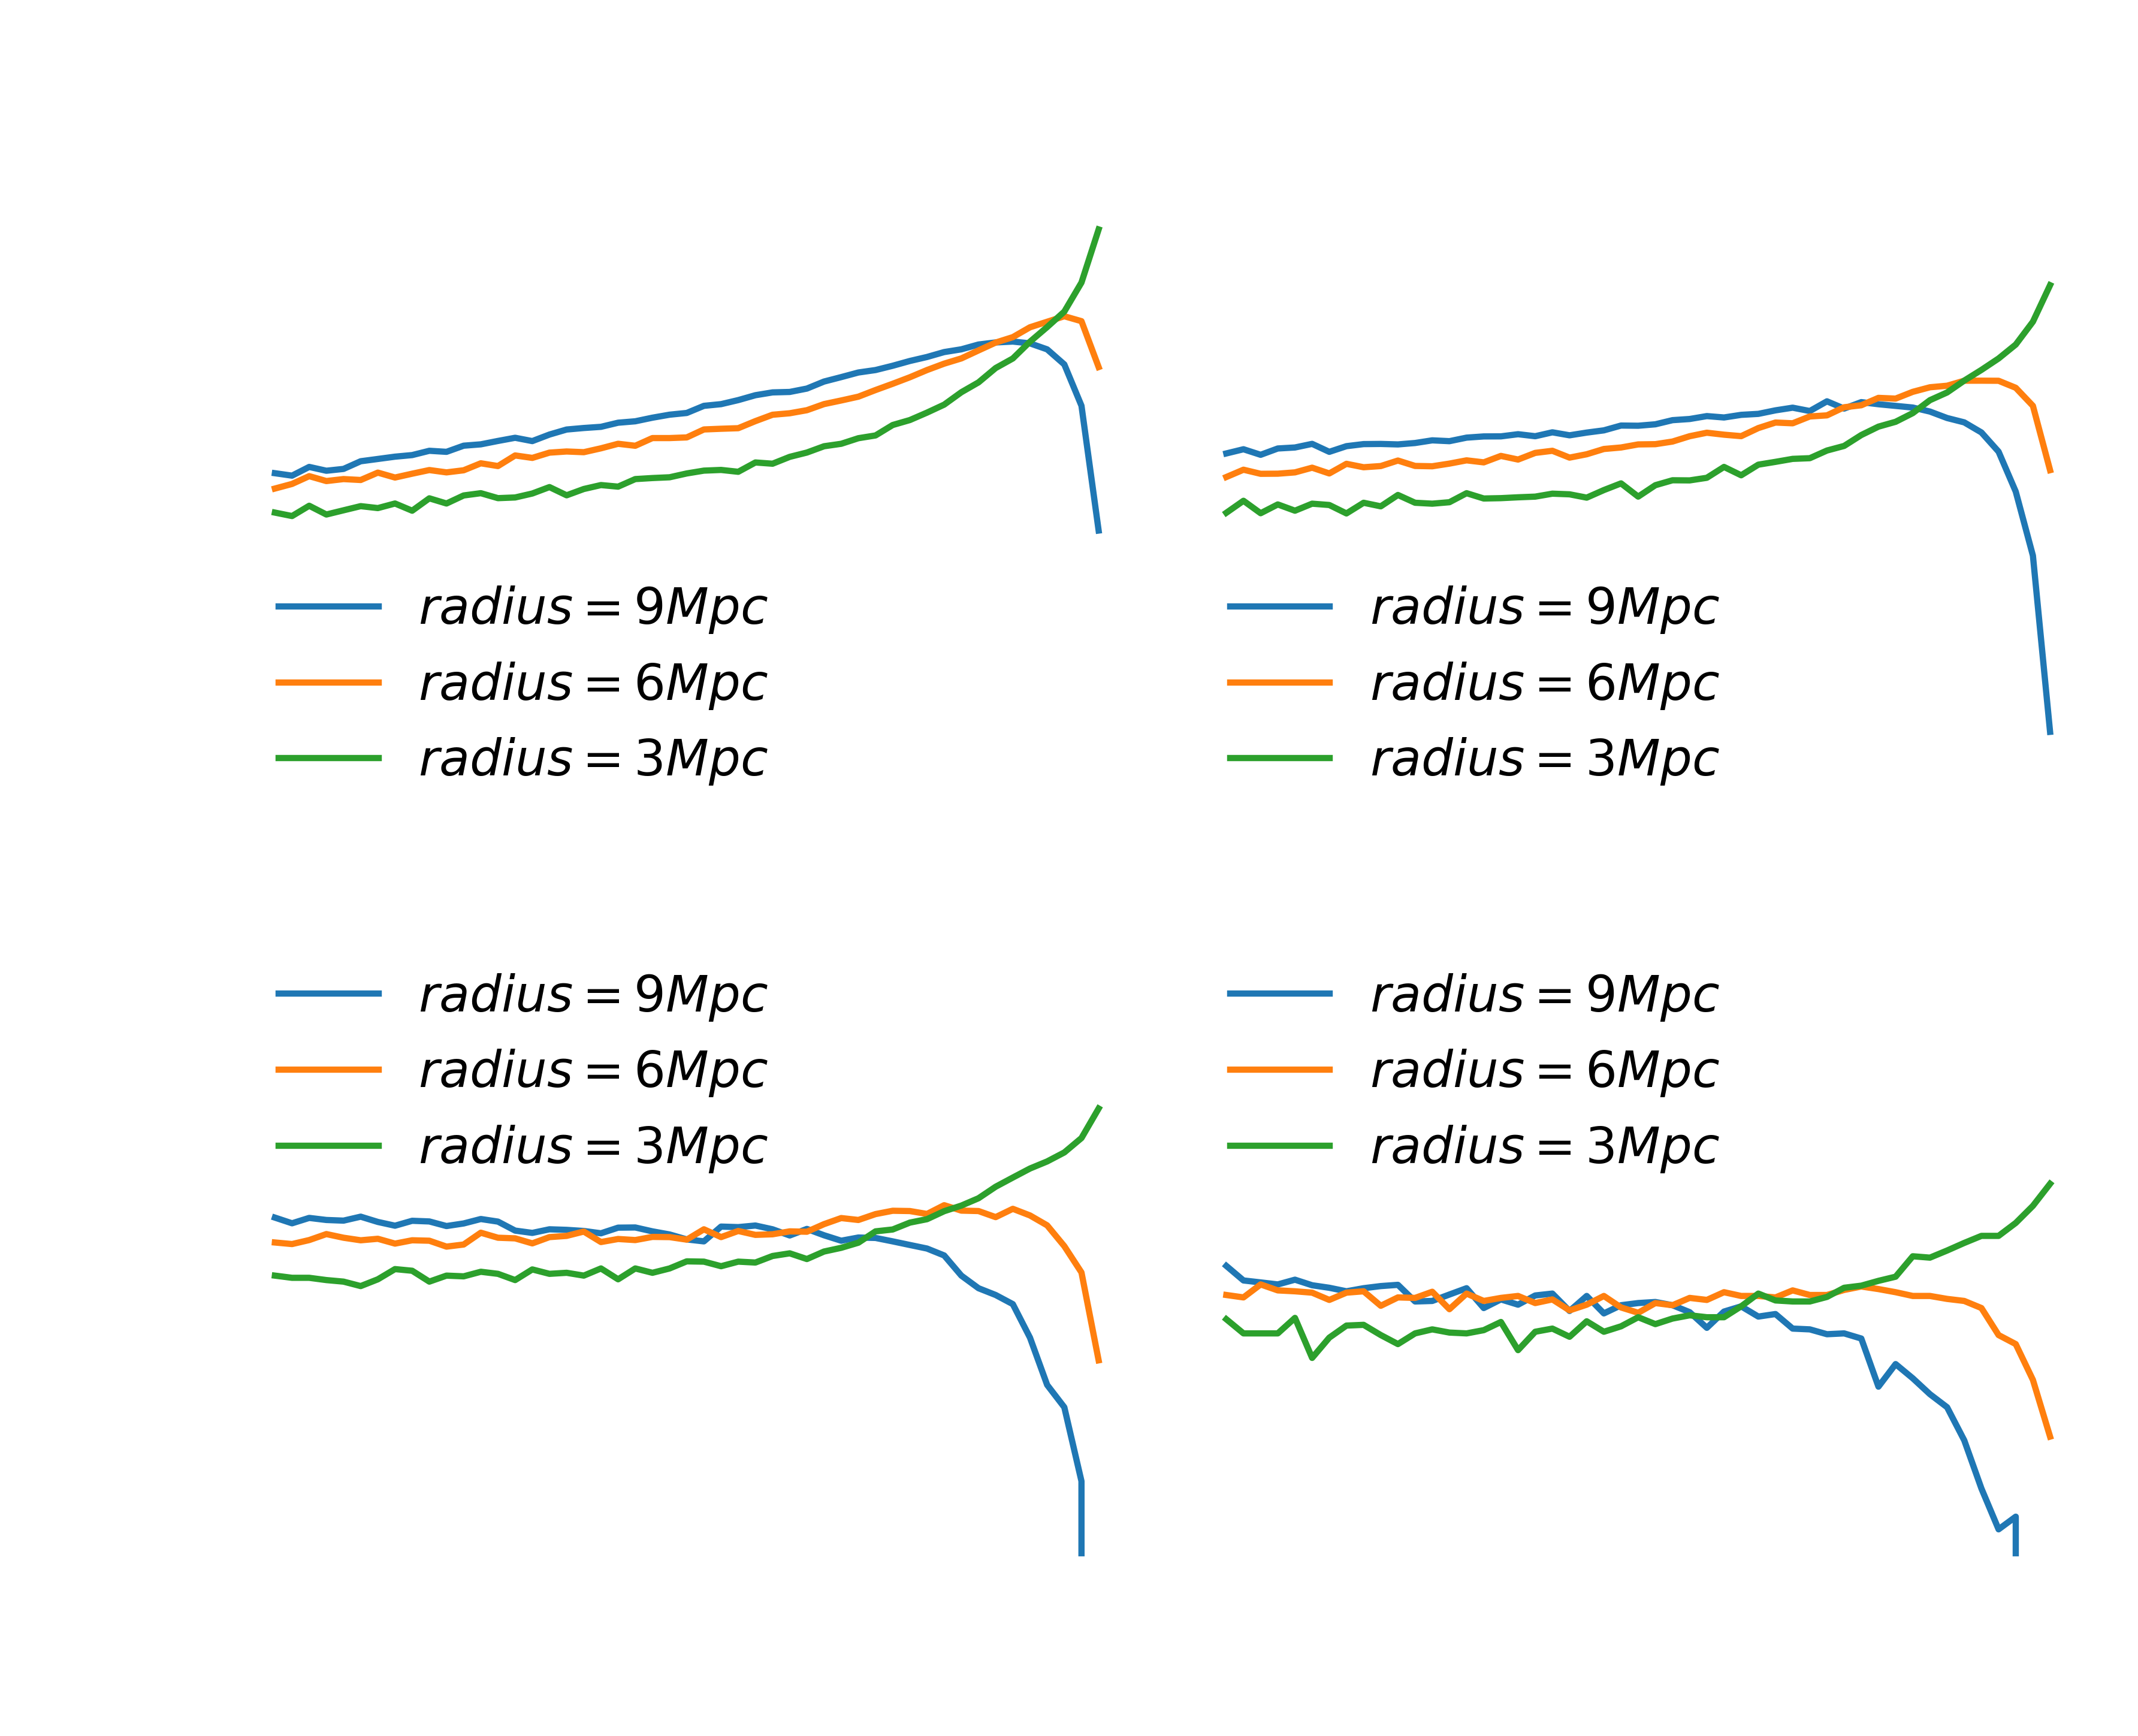

In [5]:
bins = int(5e1)
histogram(
    y1s=gaussians[[0, 2, 4, 5], ::3],       
    marker_lines=['-']*len(radii[::3]),
    y1s_labels=[f'$radius={r*BOX_LEN/HII_DIM:.0f}Mpc$' for r in radii[::3]],
    shared_title_y_position=0.975,
    shared_x_label_y_position=0.05,
    shared_y_label_x_position=0.04,
    legend_alpha=0,
    bin_num=bins, 
    x_start=0.5,
    title=[f'$z={z},$' r'$\langle x_{{HI}} \rangle$' f'$={total_neutral_fractions[[0, 2, 4, 5]][i]*100:.0f}\%$' for i,
           z in enumerate(redshifts[[0, 2, 4, 5]])],
    shared_title=f'Distribution of Average Neutral Fraction',
    shared_y_label='Sphere Counts',
    shared_x_label=f'Neutral Fraction, $x_{{HI}}$',
    figure_shape=(2,2), 
    figure_size=(8,6),
    vertical_gap=0.15,
    horizontal_gap=0.05,
    y_scale='log',
#     y_notation='sci',
    share_y_axis=True,
    dpi=500,
    color='w'
)

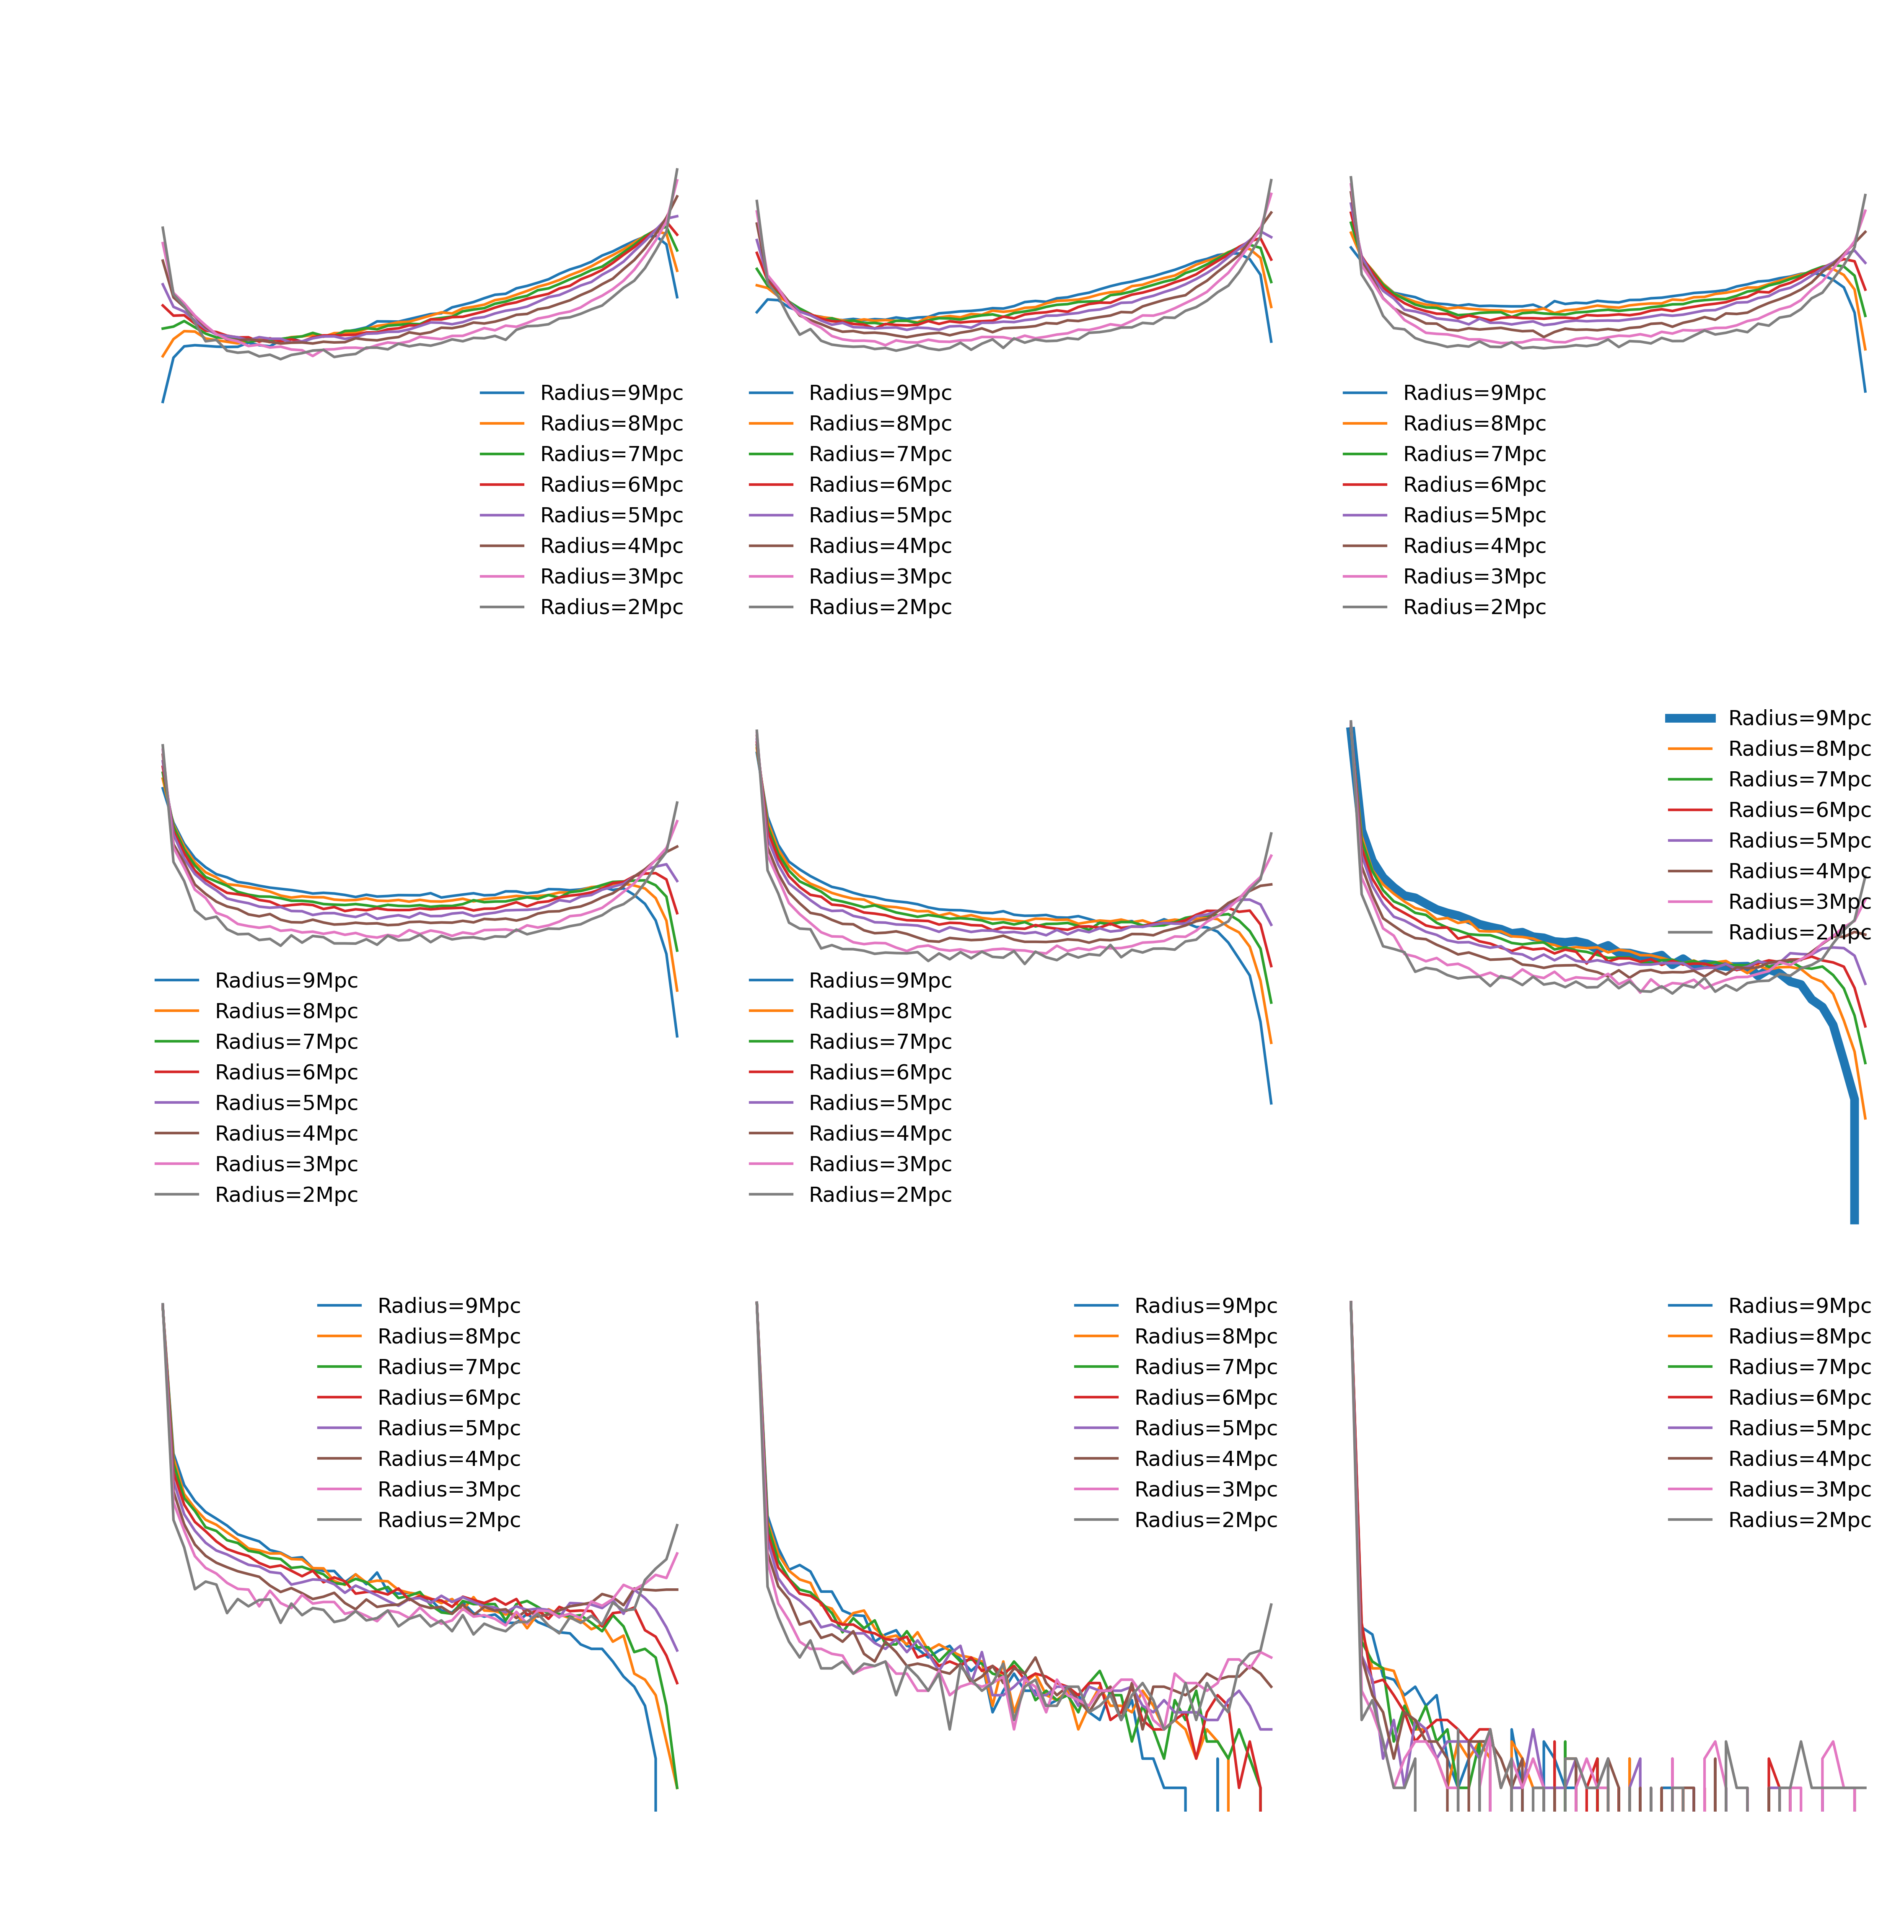

In [6]:
bins = int(5e1)
histogram(
    y1s=gaussians,       
    marker_lines=['-']*len(radii),
    y1s_labels=[f'Radius={r*BOX_LEN/HII_DIM:.0f}Mpc' for r in radii],
    legend_alpha=0,
    bin_num=bins,  
    x_start=0.0,
    title=[f'z={z}, x_HI={total_neutral_fractions[i]*100:.2f}%' for i,
           z in enumerate(redshifts)],
    shared_title=f'Distribution of Average Neutral Fraction \
({bins} bins, {iterations:.2e} iterations)',
    shared_y_label='Counts',
    shared_x_label=f'Neutral Fraction, $x_{{HI}}$',
    figure_shape=(3,3), 
    figure_size=(18,18),
    vertical_gap=0.1,
    horizontal_gap=0.05,
    y_scale='log',
#     y_notation='sci',
    share_y_axis=True,
    dpi=300,
    color='w'
)

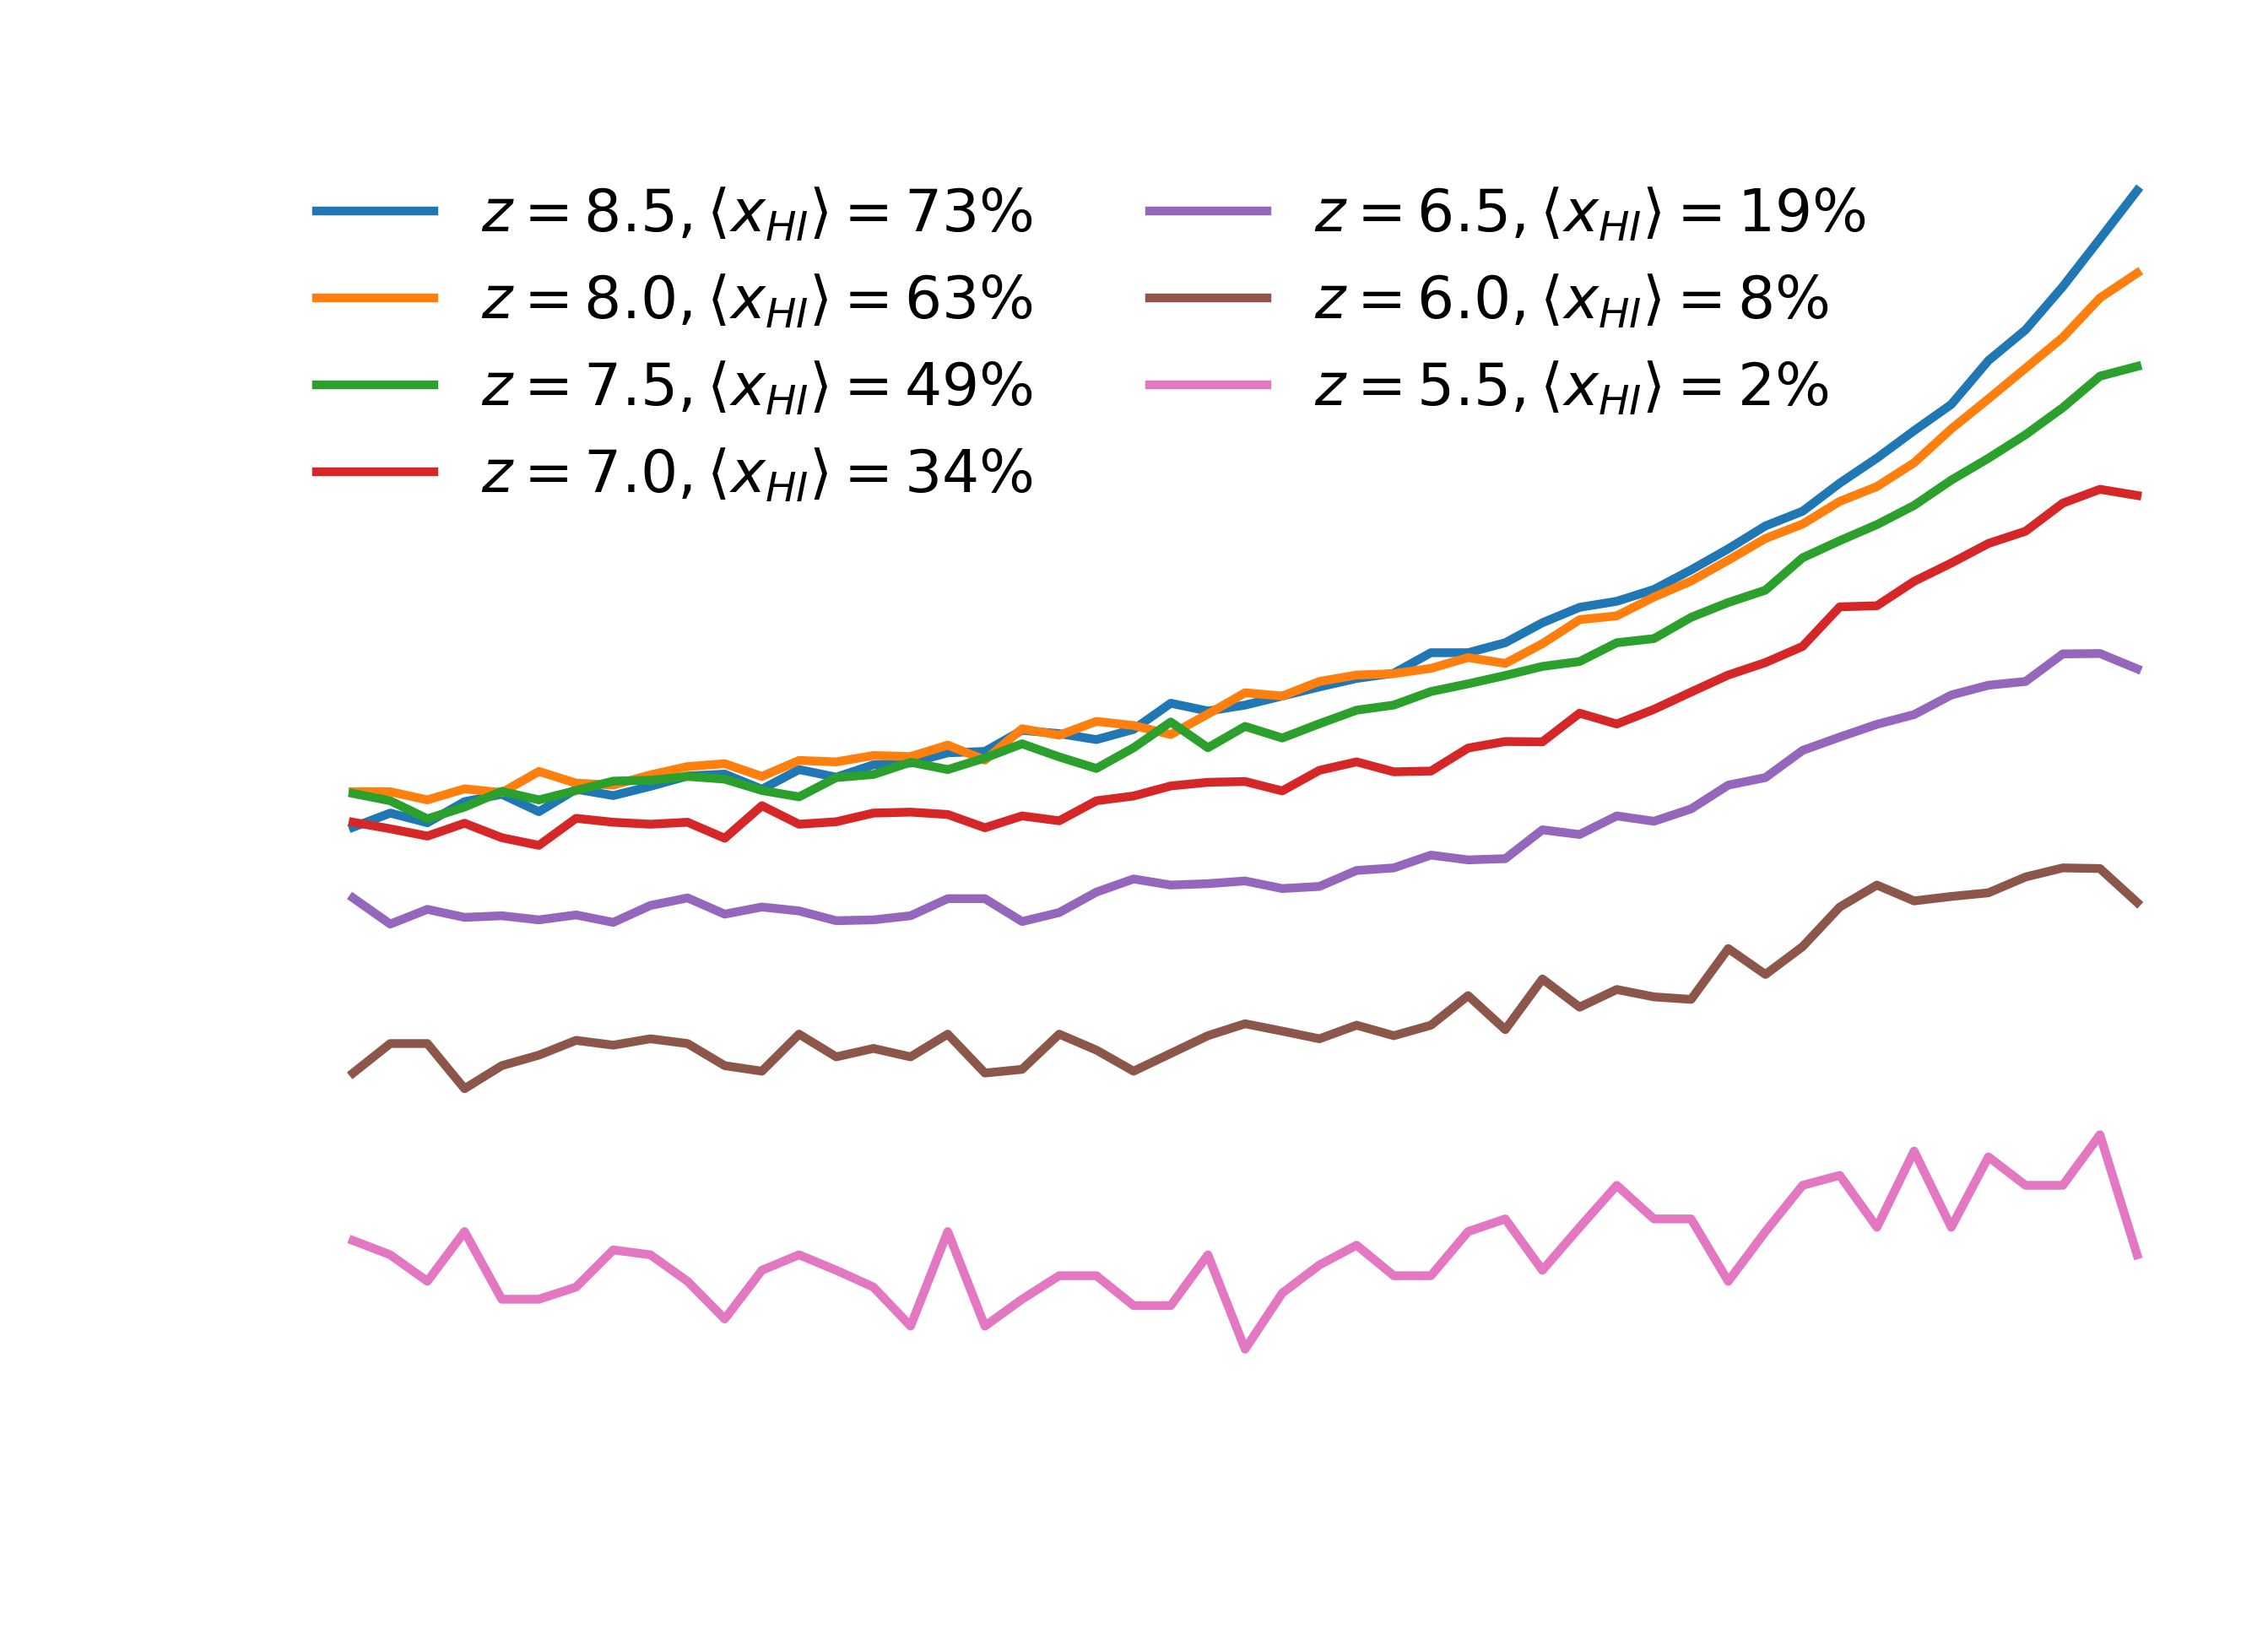

In [7]:
radius = 5
color = 'w'

fig = plt.figure(dpi=500)
ax = fig.gca()
for spine in ax.spines.values():  # figure color
    spine.set_edgecolor(color)
bin_edges = np.linspace(0.5, 1., 50) # bin_num of bins from 0-1
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

for i in range(7):
    plt.semilogy(
        bin_centers, 
        np.histogram(gaussians[i, radius], bins=bin_edges)[0],
        label=f'$z={redshifts[i]},$' r'$ \langle x_{{HI}} \rangle $' f'$={total_neutral_fractions[i]*100:.0f}\%$'
    )
plt.legend(loc='upper left', ncol=2, fancybox=True, framealpha=0.0)
plt.title(f'Distribution for $Radius, r={radii[radius]} Mpc$', color=color)
plt.xlabel(f'Neutral Fraction, $x_{{HI}}$', color=color)
plt.ylabel('Sphere Counts', color=color)
plt.tick_params(color=color, labelcolor=color, which='both')
plt.show()

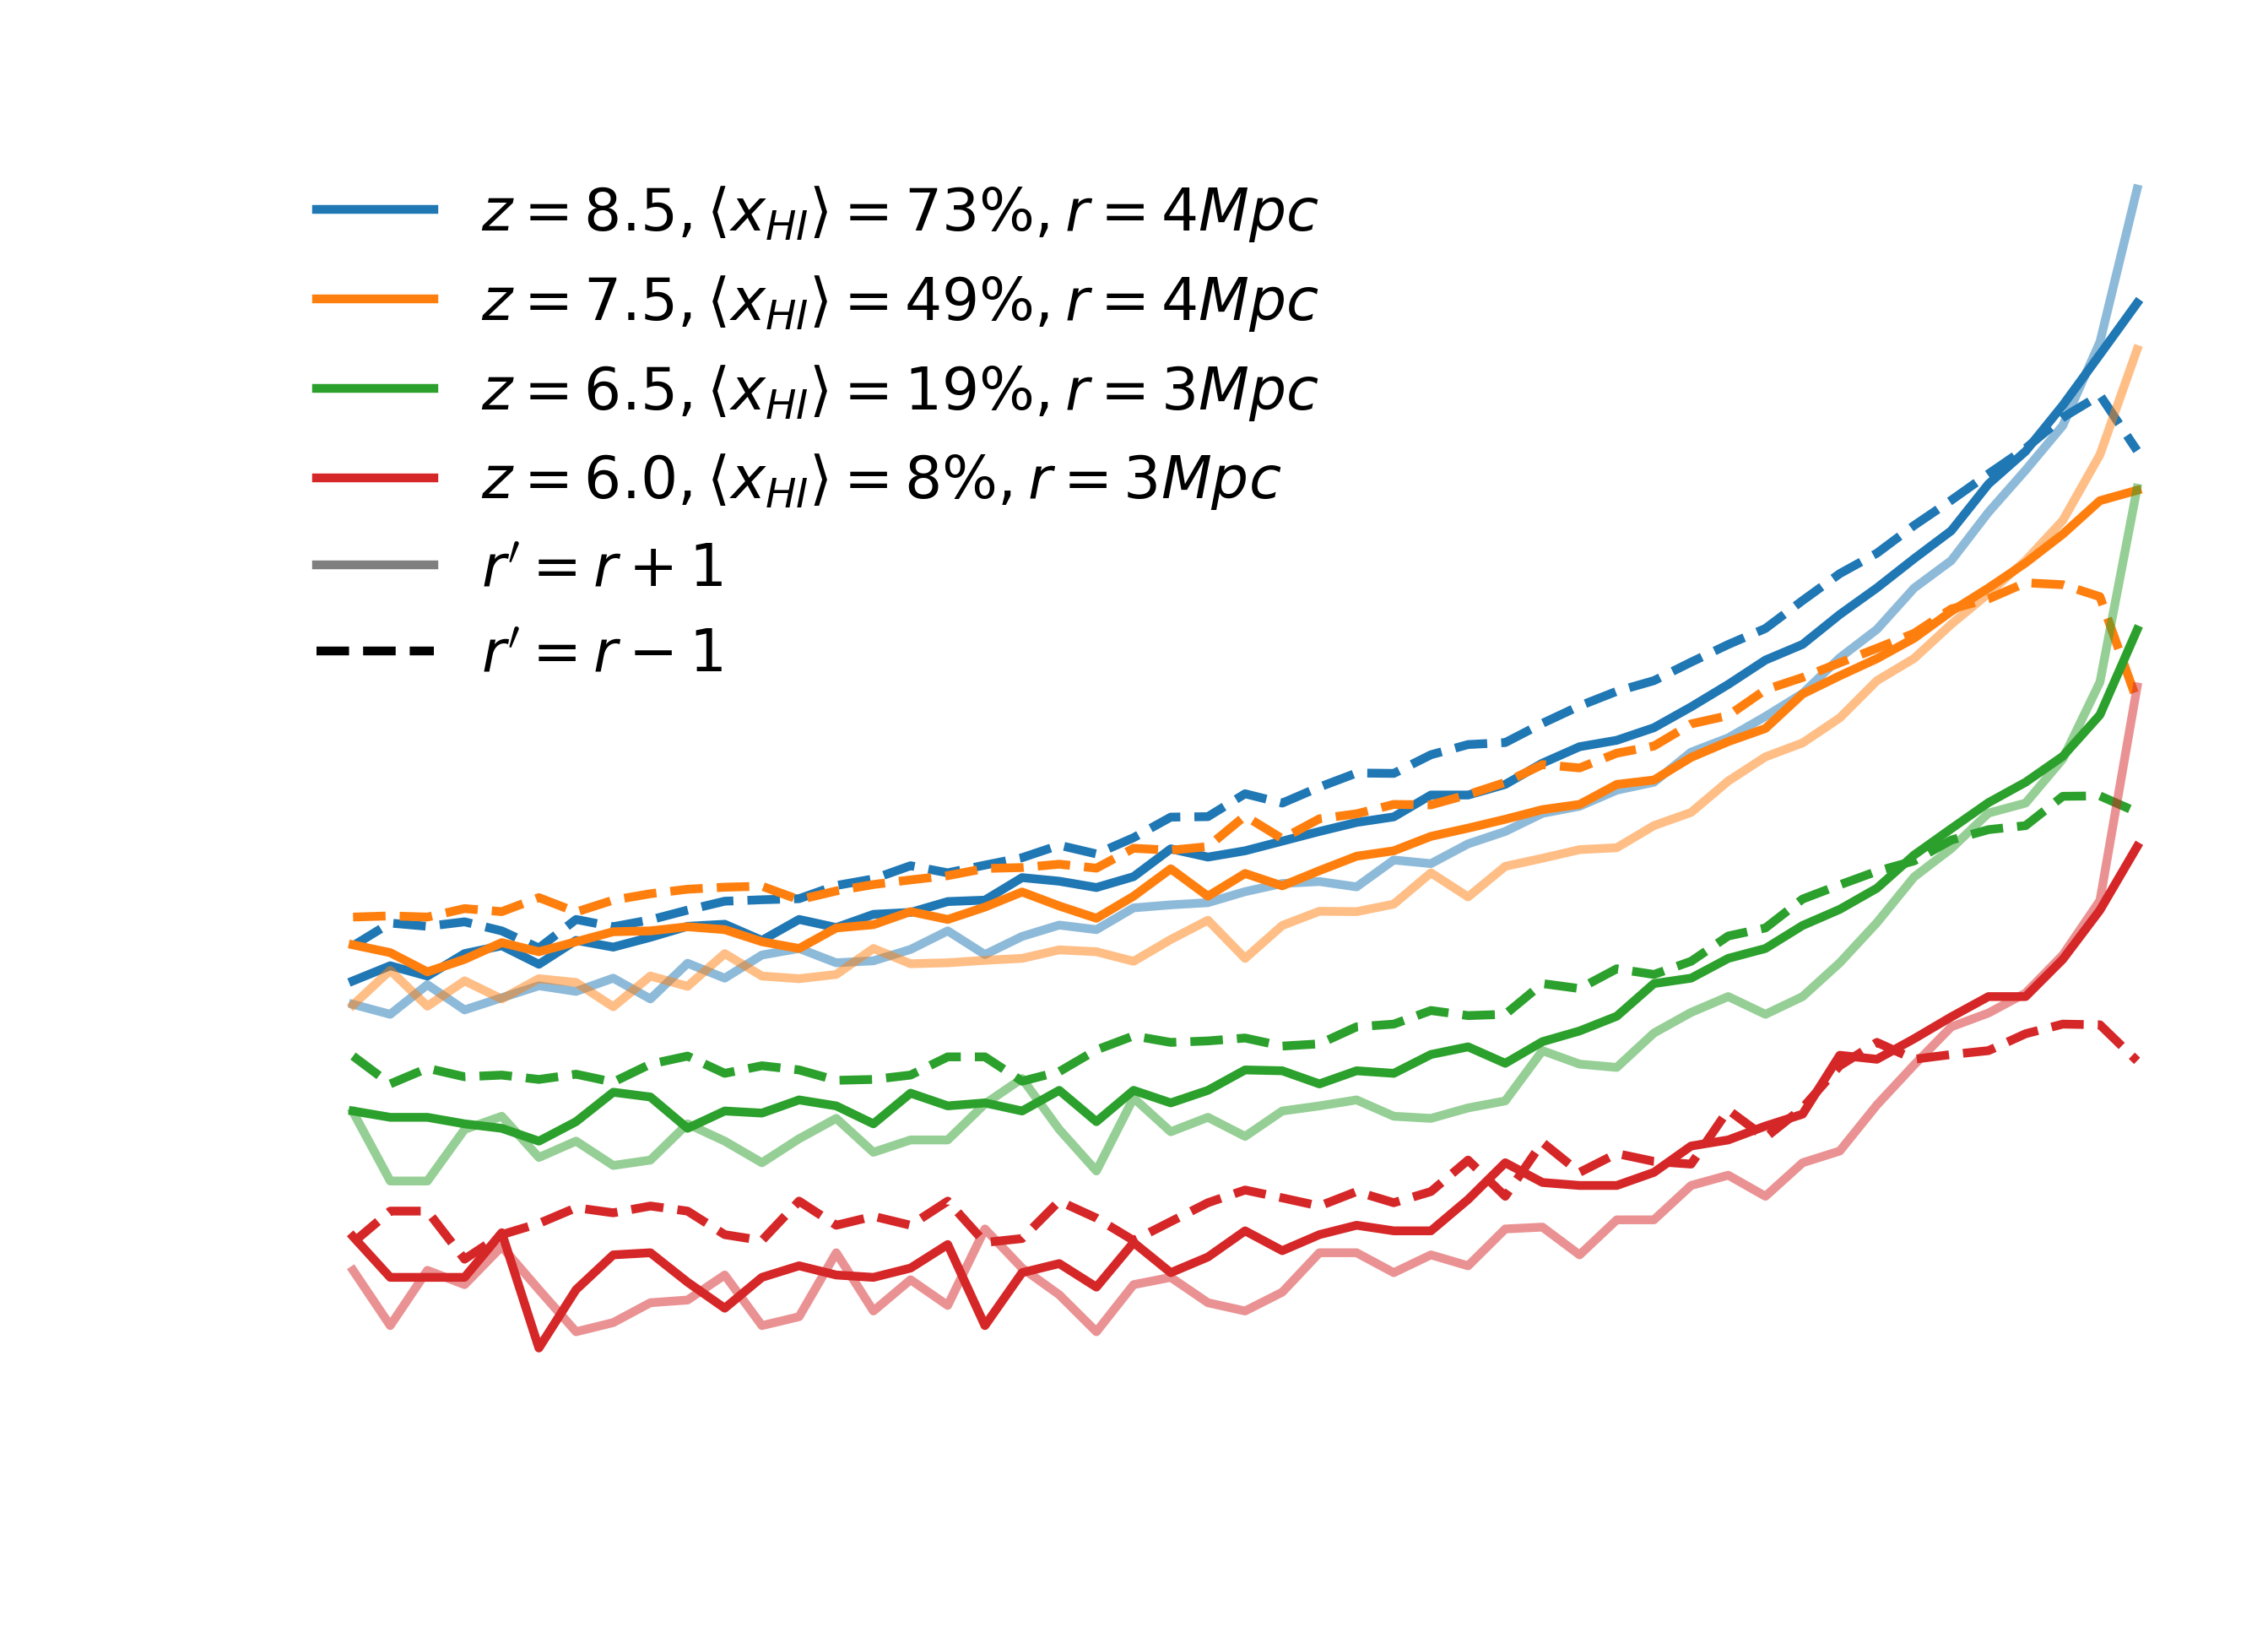

In [8]:
radius = np.array([5]*3 + [6]*5)
color = 'w'

fig = plt.figure(dpi=500)
ax = fig.gca()
for spine in ax.spines.values():  # figure color
    spine.set_edgecolor(color)
bin_edges = np.linspace(0.5, 1., 50) # bin_num of bins from 0-1
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

for j, i in enumerate(np.array([0, 2, 4, 5])):
    plt.semilogy(
        bin_centers, 
        np.histogram(gaussians[i, radius[i]], bins=bin_edges)[0],
        f'C{j}',
        label=f'$z={redshifts[i]},$' r'$ \langle x_{{HI}} \rangle $' f'$={total_neutral_fractions[i]*100:.0f}\%, r={radii[radius[i]]}Mpc$'
    )
    plt.semilogy(
        bin_centers, 
        np.histogram(gaussians[i, radius[i]+1], bins=bin_edges)[0],
        alpha=0.5
    )
    plt.semilogy(
        bin_centers, 
        np.histogram(gaussians[i, radius[i]-1], bins=bin_edges)[0],
        f'C{j}--',

    )
plt.semilogy([], [], 'k', alpha=0.5, label=f"$r'=r+1$")
plt.semilogy([], [], 'k--', label=f"$r'=r-1$")
plt.legend(fancybox=True, framealpha=0.0)
# plt.title(f'Radius = {radii[radius]} Mpc', color=color)
plt.xlabel(f'Neutral Fraction, $x_{{HI}}$', color=color)
plt.ylabel('Sphere Counts', color=color)
plt.tick_params(color=color, labelcolor=color, which='both')
plt.title(f'Distribution for Various $z$ and Radii, $r$', color=color)
plt.show()

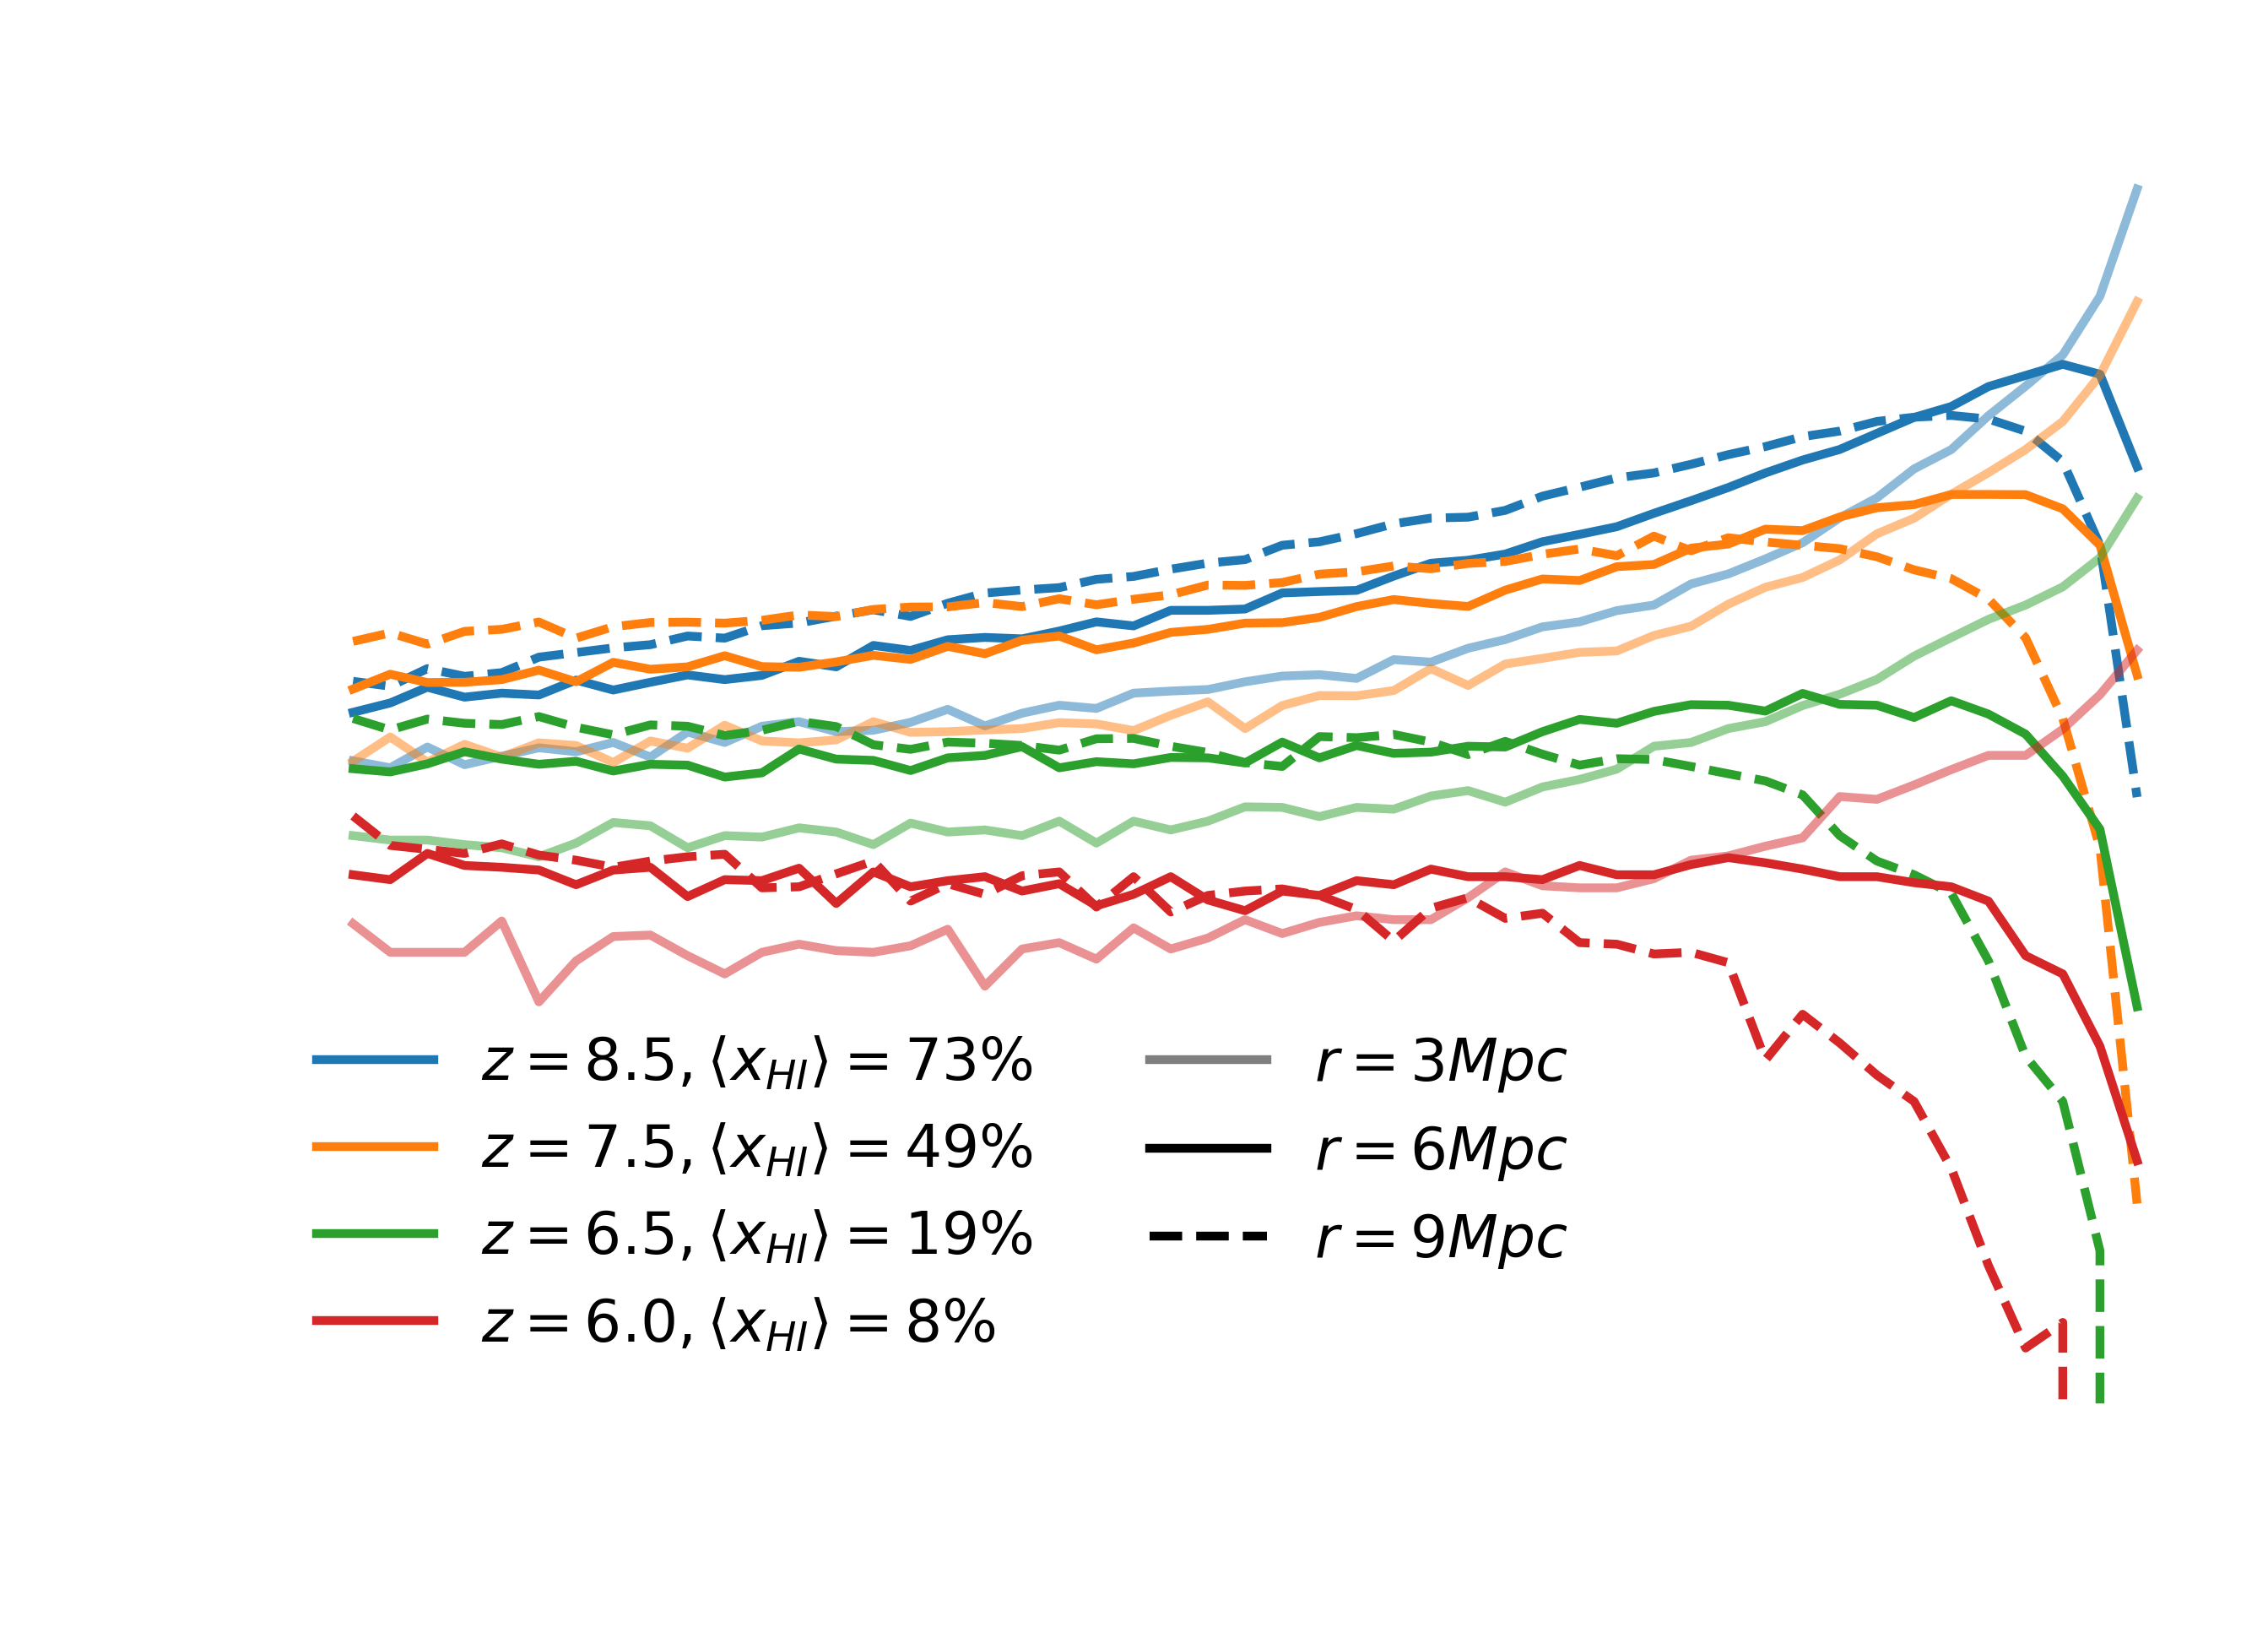

In [9]:
radius = 3
color = 'w'

fig = plt.figure(dpi=500)
ax = fig.gca()
for spine in ax.spines.values():  # figure color
    spine.set_edgecolor(color)
bin_edges = np.linspace(0.5, 1., 50) # bin_num of bins from 0-1
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

for j, i in enumerate(np.array([0, 2, 4, 5])):
    plt.semilogy(
        bin_centers, 
        np.histogram(gaussians[i, radius], bins=bin_edges)[0],
        f'C{j}',
        label=f'$z={redshifts[i]},$' r'$ \langle x_{{HI}} \rangle $' f'$={total_neutral_fractions[i]*100:.0f}\%$'
    )
    plt.semilogy(
        bin_centers, 
        np.histogram(gaussians[i, radius+3], bins=bin_edges)[0],
        alpha=0.5
    )
    plt.semilogy(
        bin_centers, 
        np.histogram(gaussians[i, radius-3], bins=bin_edges)[0],
        f'C{j}--',

    )
plt.semilogy([], [], 'k', alpha=0.5, label=f'$r={radii[radius+3]}Mpc$')
plt.semilogy([], [], 'k', label=f'$r={radii[radius]}Mpc$')
plt.semilogy([], [], 'k--', label=f'$r={radii[radius-3]}Mpc$')
plt.legend(loc='lower left', ncol=2, fancybox=True, framealpha=0.0)
# plt.title(f'Radius = {radii[radius]} Mpc', color=color)
plt.xlabel(f'Neutral Fraction, $x_{{HI}}$', color=color)
plt.ylabel('Sphere Counts', color=color)
plt.tick_params(color=color, labelcolor=color, which='both')
plt.title(f'Distribution for Various $z$ and Radii, $r$', color=color)
plt.show()

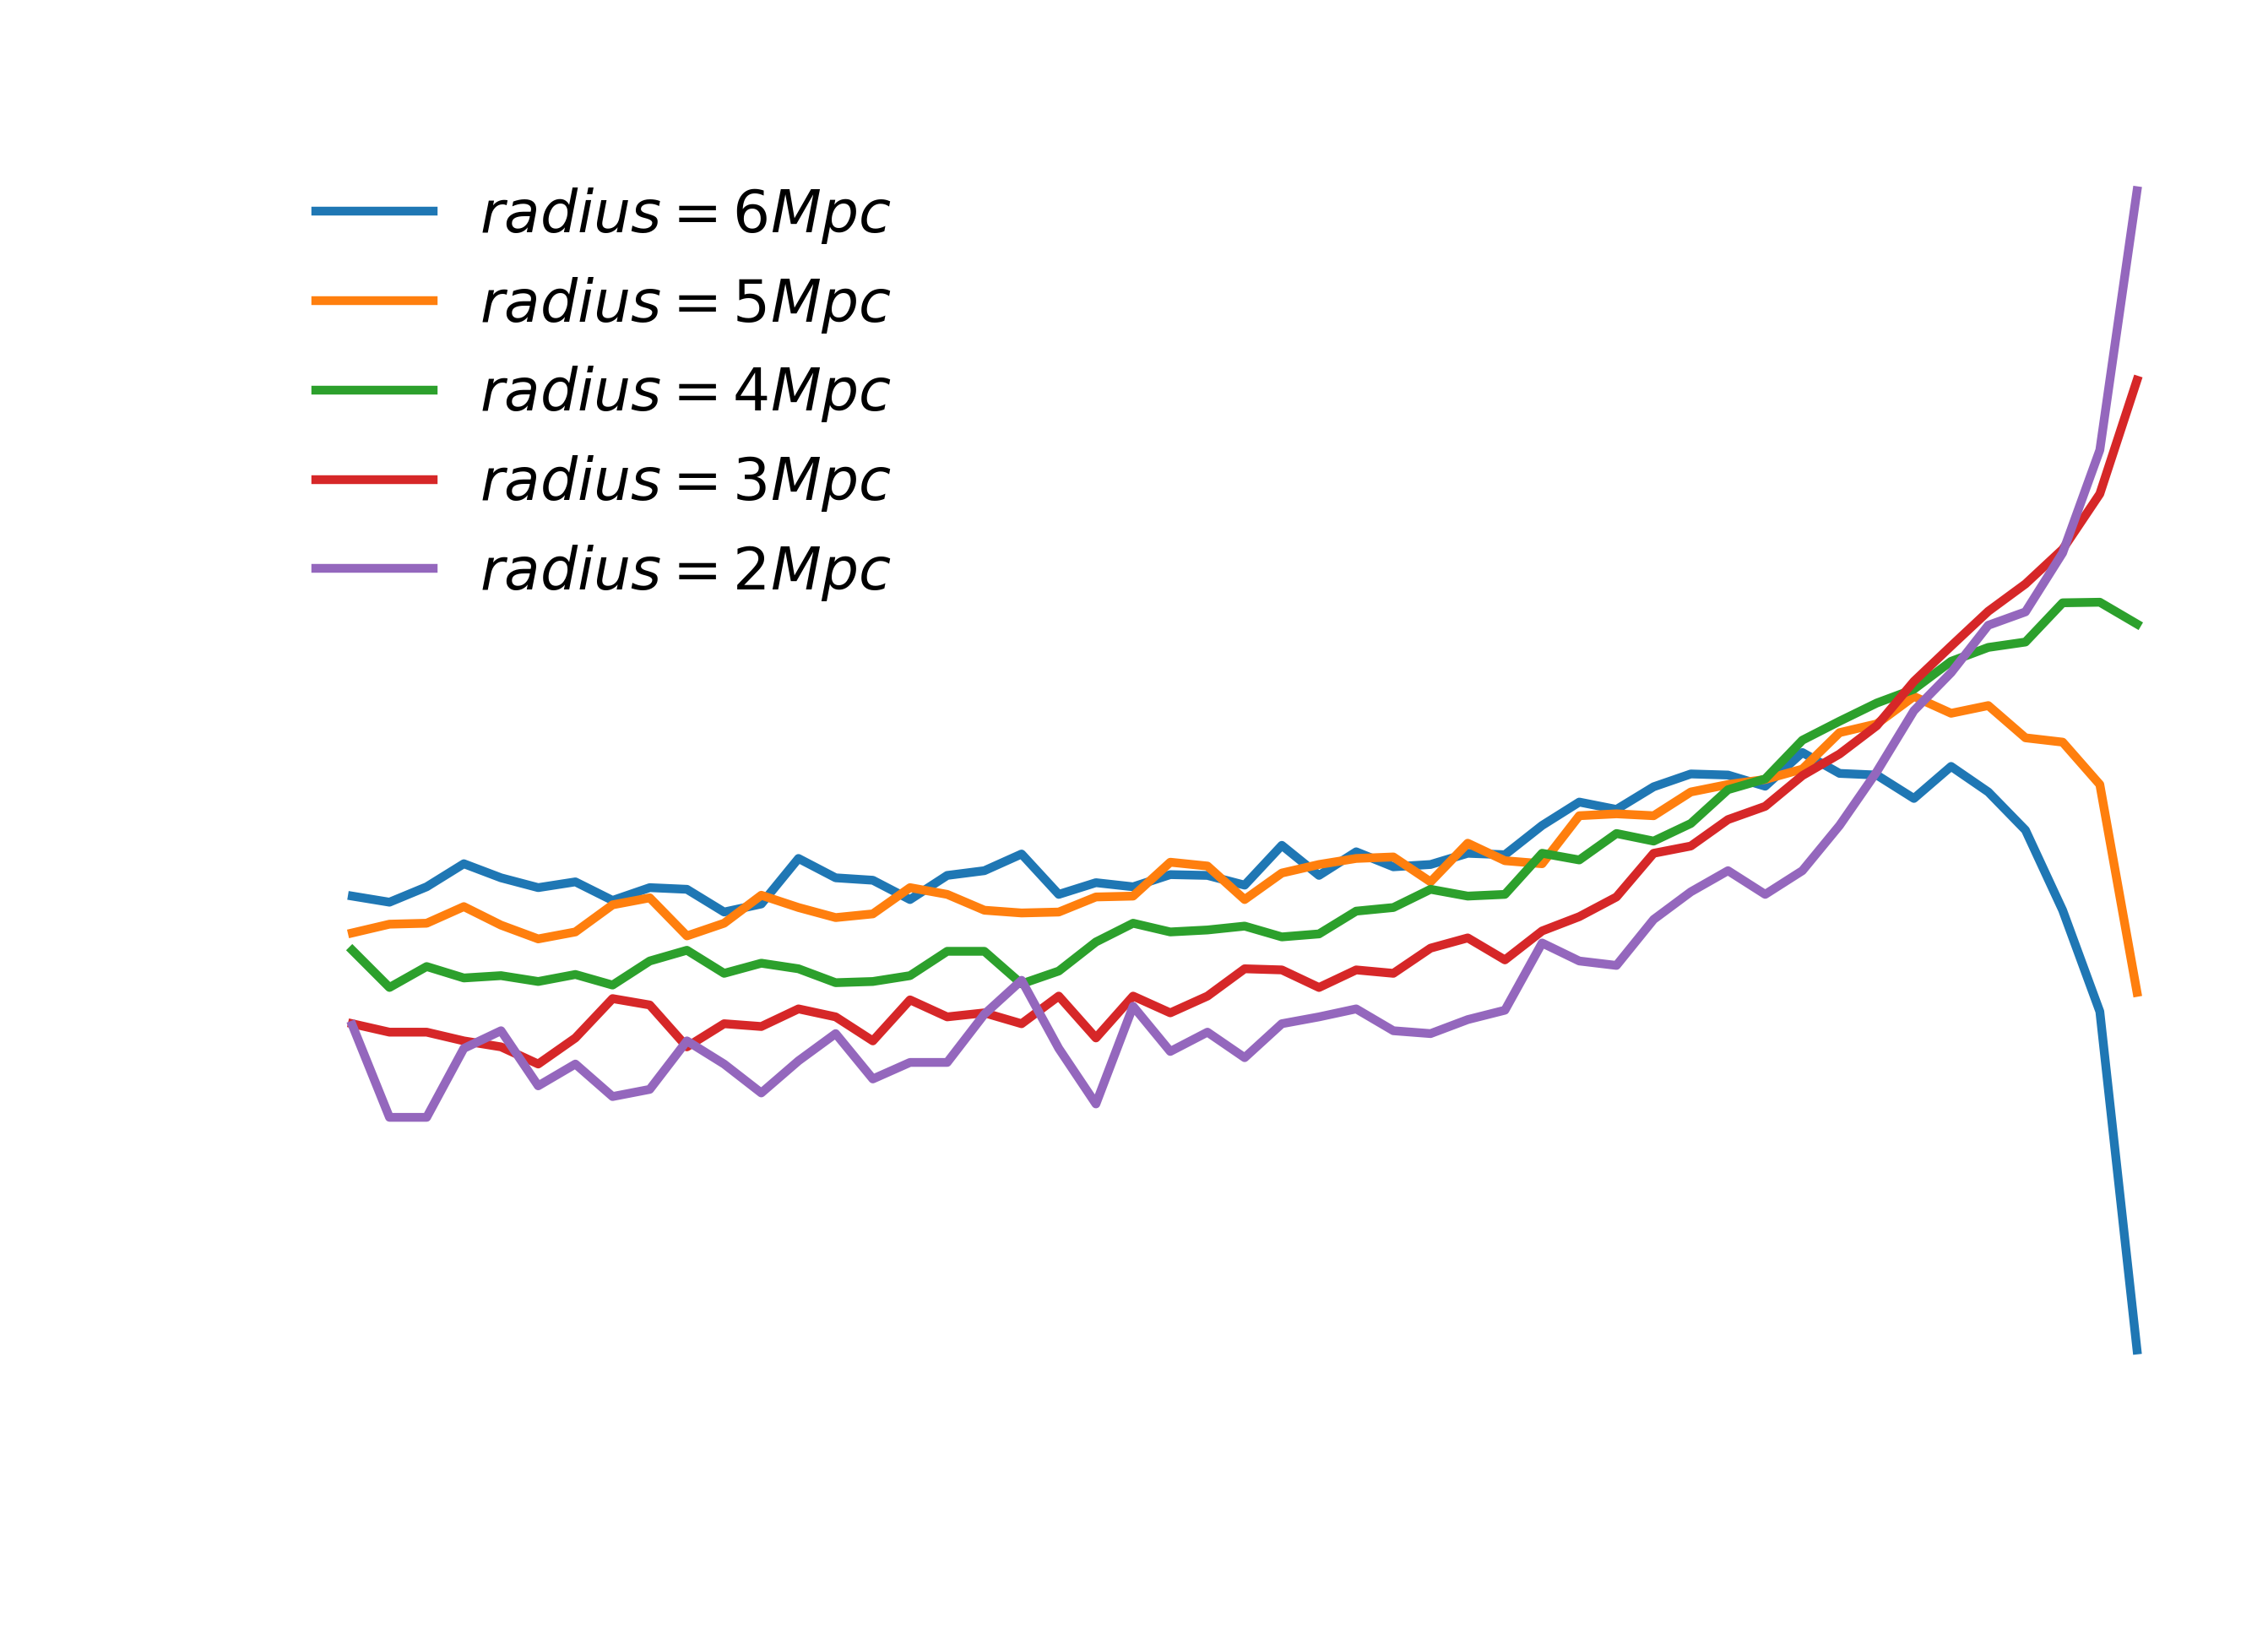

In [10]:
z = 4
color = 'w'

fig = plt.figure(dpi=500)
ax = fig.gca()
for spine in ax.spines.values():  # figure color
    spine.set_edgecolor(color)
bin_edges = np.linspace(0.5, 1., 50) # bin_num of bins from 0-1
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

for i in range(3, 8):
    plt.semilogy(
        bin_centers, 
        np.histogram(gaussians[z, i], bins=bin_edges)[0],
        label=f'$radius={radii[i]}Mpc$'
    )
plt.legend(fancybox=True, framealpha=0.0)
plt.title(f'Distribution for $z={redshifts[z]},$' r'$\langle x_{HI} \rangle$' f'$={total_neutral_fractions[z]*100:.0f}\%$', color=color)
plt.tick_params(color=color, labelcolor=color, which='both')
plt.xlabel(f'Neutral Fraction, $x_{{HI}}$', color=color)
plt.ylabel('Sphere Counts', color=color)
plt.show()